# Canyon Treefrog Occurrence Records Summary
This notebook is a tool for exploring data sets requested from GBIF (and eventually other sources), and mostly for developing criteria for filtering records (filter sets).  When the entire notebook is run, it retrieves records according to the filter sets specified and saves the results (records and some summary tables) in an sqlite database.  Some information is pulled from the parameters.sqlite database that is saved in this repository.

### General Setup

In [1]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
#import geopandas as gpd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import repo_functions as functions

### Set Variables
Fill out stuff in this cell.

In [2]:
species_id = 'acytrx0'
gap_id = 'acytrx'
common_name = "Canyon Treefrog"
summary_name = 'canyon'
gbif_req_id = 'GBIFr15'
gbif_filter_id = 'GBIFf4'
workDir = '/Users/nmtarr/Documents/Occurrence_Records/'
codeDir = '/Users/nmtarr/Code/occurrence-records-wrangler/'
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
default_coordUncertainty = 500
SRID_dict = {'WGS84': 4326, 'AlbersNAD83': 102008} # Used in file names for output.
spdb = outDir + species_id + gbif_req_id + gbif_filter_id + '.sqlite'

print("Notebook run " + str(t1))

Notebook run 2019-08-10 17:54:17.874257


In [3]:
connjup = sqlite3.connect(codeDir + 'parameters.sqlite')
cursorjup = connjup.cursor()

# Get years
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]

1999,2020


# Species Concept
Display information on the species from the parameters.sqlite database.

In [4]:
vals = cursorjup.execute("SELECT * FROM species_concepts WHERE species_id = '{0}';".format(species_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
pprint.pprint(dict(zip(cols, vals)))

{'bcb_id': None,
 'breeding_months': '',
 'common_name': 'canyon treefrog',
 'detection_distance_meters': 0,
 'end_year': '',
 'error_tolerance': 20,
 'fws_id': 'Hyla arenicolor',
 'gap_id': 'acytrx',
 'gbif_id': '2427572',
 'geometry': '',
 'itis_tsn': '173510',
 'migratory': '',
 'notes': '',
 'pad': 1,
 'scientific_name': 'Hyla arenicolor',
 'species_id': 'acytrx0',
 'start_year': '',
 'wintering_months': ''}


## Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [5]:
df1 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(df1.loc[0])

THE REQUEST FILTER SET
request_id                                                    GBIFr15
source                                                           GBIF
lat_range                                                       27,41
lon_range                                                     -91,-75
years_range                                                 1999,2020
months_range                                                     1,12
geoissue                                                        False
coordinate                                                       True
continent                                                        None
creator                                                       N. Tarr
notes           For updating  GAP range maps.  Are the years correct?
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the occurrence record sqlite database.

In [6]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(df2.loc[0])

THE POST REQUEST FILTER SET
filter_id                                                                          GBIFf4
dataset                                                                              GBIF
collection_codes_omit                                                                None
institutions_omit                                                                    None
has_coordinate_uncertainty                                                              0
max_coordinate_uncertainty                                                           5000
bases_omit                                            PRESERVED_SPECIMEN, FOSSIL_SPECIMEN
protocols_omit                                                                       None
sampling_protocols_omit                                                              None
issues_omit                   GEODETIC_DATUM_INVALID, INDIVIDUAL_COUNT_INVALID, MULTIM...
creator                                                                 

### Filter set justification
default_coord_uncertainty: I chose 500 because eBird data is included, and traveling counts may be included as a point coordinate.

years_range: I wanted current records, but not so many that runtime is slow.

months_range: I wanted to minimize the inclusion of migrating birds.

geoissue: Setting to False ensures exclusion of records with noted geoissues.

coordinate: Setting to True ensures that records are only kept if they have a coordinate.

continent: Setting to "North America" actually filters out lots of records, possibly just because the field is blank for those records.  Set to "None" for that reason.

collection_codes_omit: --

institutions_omit: --

has_coordinate_uncertainty: Did not require this because it would omit ebird data.

max_coordinate_uncertainty: No real logic behind the choice.

bases_omit: Only interested in records of living animals, so omitted preserved specimens and fossils

protocols_omit: --

sampling_protocols_omit: --

issues_omit: Invalid datums create spatial error in point locations.  Invalid counts seem like a red flag for data quality.

In [7]:
functions.retrieve_gbif_occurrences(codeDir, species_id, inDir, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, SRID_dict, outDir, summary_name)

relaxed
downloading https://www.sciencebase.gov/catalog/file/get/59f5e29fe4b063d5d307dfab?f=__disk__95%2F4e%2F9d%2F954e9d28eb598bb17e4bc8c803f7b748a2e650bc to /Users/nmtarr/Documents/Occurrence_Records/Inputs/aCYTRx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5e29fe4b063d5d307dfab?f=__disk__ec%2Fe7%2Fe4%2Fece7e4d55e30514670a82b61b3728f042b5ae541 to /Users/nmtarr/Documents/Occurrence_Records/Inputs/aCYTRx_CONUS_Range_2001v1.xml
/Users/nmtarr/Documents/Occurrence_Records/Outputs/acytrx0GBIFr15GBIFf4.sqlite

1727 records exist with the request parameters

There was a problem with the following record:
near "t": syntax error
{'protocol': 'DWC_ARCHIVE', 'basisOfRecord': 'HUMAN_OBSERVATION', 'acceptedTaxonKey': 2427572, 'scientificName': 'Hyla arenicolor Cope, 1866', 'acceptedScientificName': 'Hyla arenicolor Cope, 1866', 'taxonomicStatus': 'ACCEPTED', 'decimalLongitude': -106.214391, 'decimalLatitude': 35.620632, 'coordinateUncertaintyInMeters': 1802.0

### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [8]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records")

1079 records


### Were there duplicate records?
needs to be addressed

In [9]:
dups0 = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences GROUP BY geom_xy4326, occurrenceDate;").fetchall()
dups1 = [x[0] for x in dups0]
dups2 = [x for x in dups1 if x > 1]
print(str(len(dups2)) + ' records were duplicates based on xy coordinate and date-time')

28 records were duplicates based on xy coordinate and date-time


# Institutions
#### Pre-filters

In [10]:
institutions = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'institutions';").fetchall()
for x in institutions:
    print(x[0] + " ({0})".format(x[1]))

iNaturalist (980)
MSB (41)
49 (37)
UTEP (9)
http://biocol.org/urn:lsid:biocol.org:col:34871 (2)
68 (522)
2027 (34)
20 (22)
MVZ (6)
http://biocol.org/urn:lsid:biocol.org:col:34852 (8)
17 (1)
1849 (37)
http://grbio.org/cool/5bc7-5n0c (2)
1932 (2)
YPM (1)
urn:lsid:biocol.org:col:34844 (3)
1884 (1)
OMNH (4)
1885 (3)
UCM (11)
558 (1)


#### Post-filter

In [11]:
institutions = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'institutions' AND step = 'filter';").fetchone()[0]
institutions = institutions.replace('[', '').strip().replace(']', '').replace("'", "")
institutions = institutions.split(',')
for ins in institutions:
    print(ins.strip())

iNaturalist
ENCB-IPN
FESI-UNAM
IE-UNAM
CIB-UAEM


# Collections
#### Pre-filters

In [12]:
collections = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'collections';").fetchall()
for x in collections:
    print(x[0] + " ({0})".format(x[1]))

Observations (980)
Amphibian and reptile specimens (67)
NO APLICA (230)
Amphibians & Reptiles (2)
ENCB (34)
CNAR (22)
Herpetology (11)
CIB-UAEH (37)
HERP (2)
MZFC (2)
VZ (1)
OCGR (2)
Amphibians (2)
UABC (3)
LE-UBIPRO (327)
MVZ (1)
CARUM (4)


#### Post-filters

In [13]:
collections = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'collections' AND step = 'filter';").fetchone()[0]
collections = collections.replace('[', '').strip().replace(']', '').replace("'", "")
collections = collections.split(',')
for colls in collections:
    print(colls.strip())

Observations
NO APLICA


# Bases
#### Pre-filter

In [14]:
bases = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'bases';").fetchall()
for x in bases:
    print(x[0] + " ({0})".format(x[1]))

HUMAN_OBSERVATION (1210)
PRESERVED_SPECIMEN (517)


#### Post-filters

In [15]:
bases = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'bases' AND step = 'filter';").fetchone()[0]
bases = bases.replace('[', '').strip().replace(']', '').replace("'", "")
bases = bases.split(",")
for bas in bases:
    print(bas.strip())

HUMAN_OBSERVATION


# Protocols
#### Pre-filters

In [16]:
protocols = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'protocols';").fetchall()
for x in protocols:
    print(x[0] + " ({0})".format(x[1]))

DWC_ARCHIVE (1727)


#### Post-filters

In [17]:
protos = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'protocols' AND step = 'filter';").fetchall()[0]
for pro in protos:
    pro = pro.replace('[', '').strip().replace(']', '').replace("'", "")
    print(pro)

DWC_ARCHIVE


# Issues
#### Pre-filters

In [18]:
issues = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'issues';").fetchall()
for x in issues:
    print(x[0] + " ({0})".format(x[1]))

COORDINATE_ROUNDED (1445)
GEODETIC_DATUM_ASSUMED_WGS84 (1530)
COORDINATE_UNCERTAINTY_METERS_INVALID (3)
GEODETIC_DATUM_INVALID (523)
TAXON_MATCH_HIGHERRANK (661)
ELEVATION_MIN_MAX_SWAPPED (217)
COORDINATE_REPROJECTED (25)
COUNTRY_DERIVED_FROM_COORDINATES (3)


#### Post-filters

In [19]:
issues = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'issues' AND step = 'filter';").fetchone()[0]
issues = issues.replace('[', '').strip().replace(']', '').replace("'", "")
issues = issues.split(',')
for iss in issues:
    print(iss.strip())

COORDINATE_UNCERTAINTY_METERS_INVALID
ELEVATION_MIN_MAX_SWAPPED
GEODETIC_DATUM_INVALID
GEODETIC_DATUM_ASSUMED_WGS84
COORDINATE_ROUNDED
TAXON_MATCH_HIGHERRANK


# Descriptions of filtered records

### Locations

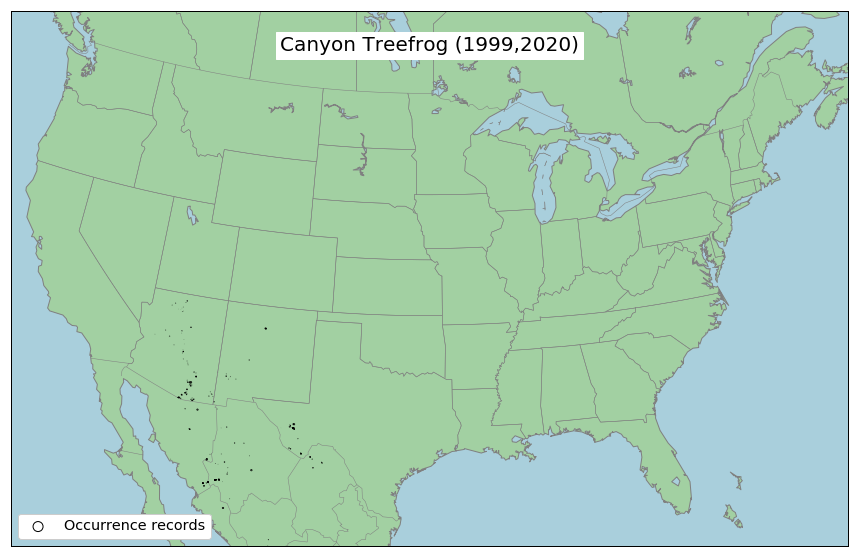

In [20]:
gap_range2 = "{0}{1}_range_4326".format(inDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP range map',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'y',
        'fillcolor': 'y', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
if os.path.isfile(gap_range2 + ".shp"):
    map_these=[shp1, shp2]
else:
    map_these=[shp2]
    
title="{1} ({0})".format(years, common_name)
functions.MapShapefilePolygons(map_these=map_these, title=title)

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

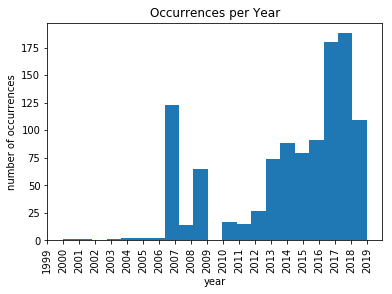

In [21]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of occurrences")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

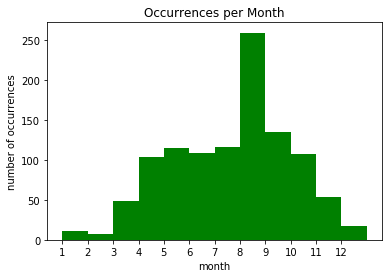

In [22]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of occurrences")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

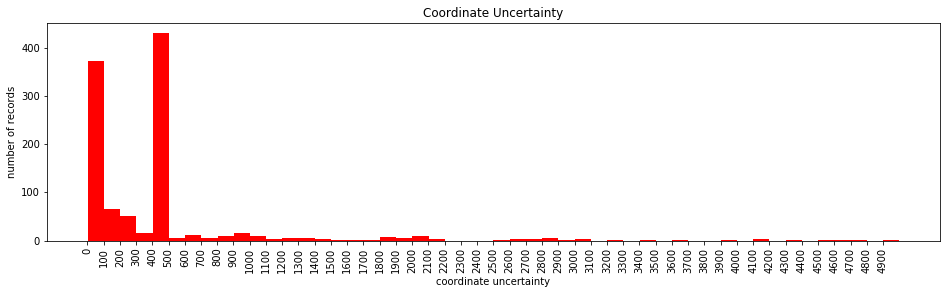

In [23]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

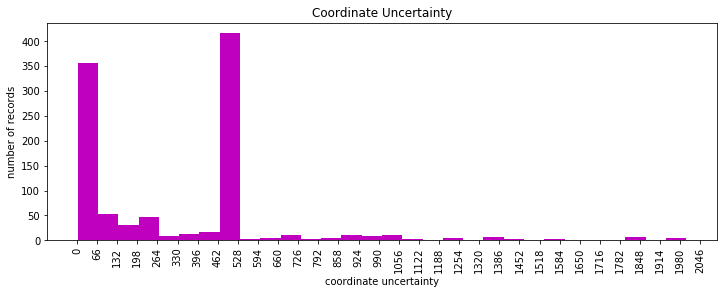

In [24]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

### Geodetic datums present

In [25]:
datums = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'datums' AND step = 'filter';").fetchone()[0]
datums = datums.replace('[', '').strip().replace(']', '').replace("'", "")
datums = datums.split()
for datum in datums:
    print(datum)

WGS84


### Establishment means reported

In [26]:
establishment = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

### Identification qualifiers included

In [27]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM record_attributes WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

### Remarks included

In [28]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
#remarks = remarks.replace('[', '').strip().replace(']', '').replace("'", "")
#remarks = remarks.split(',')
if len(remarks) <= 20:
    for rem in remarks:
        if rem[0][0:1] == ';':
            print(rem[0][2:])
        else:
            print(rem[0])
else:
    print("More than 20 remarks, consult the occurrence database.")

More than 20 remarks, consult the occurrence database.


### Sources

In [29]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

GBIF


### Attributes returned for the records in the request (pre-filters)

In [30]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ, index_col='index')
fields_summary.index.name = 'field'
print(fields_summary)

                                      included(n)  populated(n)
field                                                          
acceptedNameUsage                             660           660
acceptedScientificName                       1727          1727
acceptedTaxonKey                             1727          1727
accessRights                                  741           741
associatedReferences                            1             1
basisOfRecord                                1727          1727
bibliographicCitation                         664           664
catalogNumber                                1727          1727
class                                        1727          1727
classKey                                     1727          1727
collectionCode                               1727          1727
collectionID                                  740           740
continent                                      83            83
coordinateUncertaintyInMeters           

### Runtime

In [31]:
t2 = datetime.now()
print(t2 - t1)

0:02:47.566984
